## Logistic regression

This exercise is described in [ex2.pdf](data/ml-ex2/ex2.pdf).

In [139]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.special import logit

%matplotlib inline

In [140]:
data = np.loadtxt('data/ml-ex2/ex2data1.txt', delimiter=',')

In [141]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [142]:
# LogisticRegression estimator expect an y row vector
y = y.ravel()


**Logistic regression hypothesis:** 
$$ h_ \theta (x) =   g(\theta^Tx )  $$



**Sigmoid function:** 
$$ g (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z}}  $$ 

**Cost function in logistic regression:**
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m[ - y^{(i)} log(h_\theta  (x^{(i)})) – (1 – y^{(i)}) log(1-h_\theta  (x^{(i)}))]  $$



**The gradient of the cost is a vector of the same length as $ \theta $ where the $ j^{th} $ element (for j = 0, 1, . . . ,n) is defined as follows:**

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$



### Unregularized logistic regression

In [143]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does.
# Parameter C ist the inverse regularization strength (high values = low regularization).
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1000000000.0)

In [144]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]
print(theta0, theta1, theta2)

-25.16138567101981 0.20623222395628113 0.20147190519771901


In [145]:
# Computes x2 at y = logit(0.5) from x1 and model parameters
# based on equation y = sigmoid(theta0 + theta1*x1 + theta2*x2)
# where logit is the inverse of sigmoid.
# (used for computing the linear decision boundary)
def x2(x1):
    return (logit(0.5) - theta0 - theta1*x1) / theta2

In [146]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [147]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

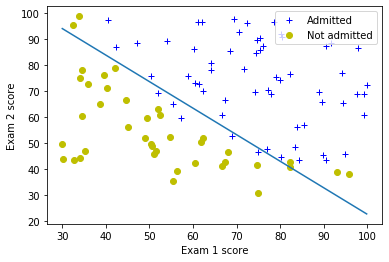

In [149]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

In [150]:
X_test = np.array([
    [45., 85.],
    [50., 50.],
    [80., 80.]
])

In [151]:
# Predict class
clf.predict(X_test)

array([1., 0., 1.])

In [153]:
# Predict class probabilities
np.set_printoptions(precision=4,suppress=True)
clf.predict_proba(X_test)

array([[0.2237, 0.7763],
       [0.9916, 0.0084],
       [0.0006, 0.9994]])

In [154]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [121]:
theta0, theta1, theta2

(-25.16138567101981, 0.20623222395628113, 0.20147190519771901)

In [155]:
# Classification accuracy on training set
clf.score(X, y)

0.89

### Regularized logistic regression

In [163]:
# Microchip test: 
# - test 1 (x1) 
# - test 2 (x2)
# - accepted=1, rejected=0 (y)
data = np.loadtxt('data/ml-ex2/ex2data2.txt', delimiter=',')

In [164]:
# LogisticRegression estimator expect an y row vector
X, y = np.hsplit(data, np.array([2]))

In [165]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

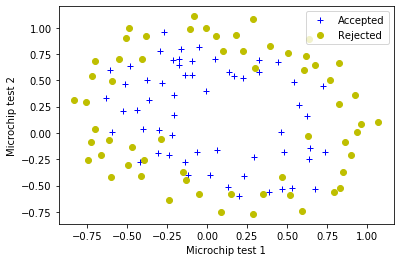

In [166]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Accepted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Rejected')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.legend(loc='upper right')

In [167]:
# Preprocessor to include polynomial features up to degree 6
poly = PolynomialFeatures(6, include_bias=False)

# Mean and standard deviation scaler
scaler = StandardScaler()

# Logistic regression classifier. 
# - C=1.0 will result in good fit
# - C=1e4 will result in overfit (to little regularization)
# - C=1e-2 will result in underfit (to much regularization)
clf = LogisticRegression(C=1.0, solver='lbfgs')

# Pipeline of polynomial feature generator, feature scaler and linear regressor
model = Pipeline([('poly', poly), ('scaler', scaler), ('clf', clf)])

# Fit data to model
model.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [168]:
# Classification accuracy on training set
model.score(X, y)

0.8305084745762712

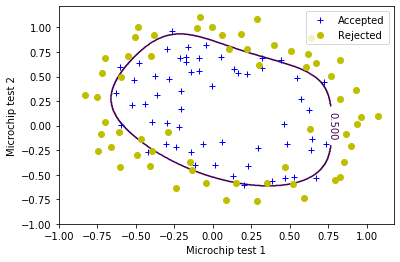

In [169]:
grid = np.mgrid[-1:1:500j, -1:1:500j]

# Compute acceptance probabilities on 500*500 grid 
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, 'g-', levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig